In [1]:
import pandas as pd
import numpy as np


Loading the Datasets


In [2]:
# Load datasets
crop_df = pd.read_csv("Crop_recommendation.csv")
fao_df = pd.read_csv("FAOSTAT_data_en_12-8-2025.csv")

print("Crop Dataset Shape:", crop_df.shape)
print("FAOSTAT Dataset Shape:", fao_df.shape)


Crop Dataset Shape: (2200, 8)
FAOSTAT Dataset Shape: (5940, 15)


Analyzing the datasets


In [83]:

crop_df.head(), fao_df.head()


(    N   P   K  temperature   humidity        ph    rainfall label label_norm
 0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice       rice
 1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice       rice
 2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice       rice
 3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice       rice
 4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice       rice,
   Domain Code                        Domain  Area Code (M49)   Area  \
 0         QCL  Crops and livestock products              356  India   
 1         QCL  Crops and livestock products              356  India   
 2         QCL  Crops and livestock products              356  India   
 3         QCL  Crops and livestock products              356  India   
 4         QCL  Crops and livestock products              356  India   
 
    Element Code         Element  Item Code (CPC)       Item  Year Code  Year  \
 0          5312

In [84]:
# Dataset info
crop_df.info()
fao_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   label_norm   2200 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 154.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10519 entries, 0 to 10518
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       10519 non-null  object 
 1   Domain            10519 non-null  object 
 2   Area Code (M49)   10519 non-null  int64  
 3   Area              1

In [5]:

print(crop_df.isnull().sum())
print(fao_df.isnull().sum())


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Item Code (CPC)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                213
Flag                   0
Flag Description       0
Note                5825
dtype: int64


In [6]:
# Fill missing numerical values with mean
crop_df.fillna(crop_df.mean(numeric_only=True), inplace=True)
fao_df.fillna(fao_df.mean(numeric_only=True), inplace=True)


In [7]:
# Remove duplicates
crop_df.drop_duplicates(inplace=True)
fao_df.drop_duplicates(inplace=True)

print("Crop Dataset After Cleaning:", crop_df.shape)
print("FAOSTAT Dataset After Cleaning:", fao_df.shape)


Crop Dataset After Cleaning: (2200, 8)
FAOSTAT Dataset After Cleaning: (5940, 15)


Exploding the column(item)

In [8]:
import pandas as pd

fao_df = pd.read_csv("FAOSTAT_data_en_12-8-2025.csv")
print("Original FAOSTAT shape:", fao_df.shape)


Original FAOSTAT shape: (5940, 15)


In [9]:
import pandas as pd

# Ensure Item is string
fao_df['Item'] = fao_df['Item'].astype(str)

# Split on comma OR ' and ' (case-insensitive)
fao_df['Item'] = fao_df['Item'].str.split(r'(?i),|\sand\s')

# Explode into rows
fao_exploded_df = fao_df.explode('Item')

# Clean crop names
fao_exploded_df['Item'] = (
    fao_exploded_df['Item']
    .str.strip()
    .str.title()
)

print("FAOSTAT shape after exploding:", fao_exploded_df.shape)


FAOSTAT shape after exploding: (10519, 15)


In [10]:
fao_exploded_df.to_csv("FAOSTAT_exploded_clean.csv", index=False)
print("✅ Exploded FAOSTAT dataset saved as FAOSTAT_exploded_clean.csv")


✅ Exploded FAOSTAT dataset saved as FAOSTAT_exploded_clean.csv


In [12]:
import pandas as pd
import ast

df = pd.read_csv("FAOSTAT_exploded_clean.csv")
print(df['Item'].head())

0        Anise
1       Badian
2    Coriander
3        Cumin
4      Caraway
Name: Item, dtype: object


In [13]:
df['Item'] = (
    df['Item']
    .astype(str)
    .str.replace(r"[\[\]']", "", regex=True)   # remove [ ] and '
    .str.strip()
)


In [14]:
df = df[df['Item'] != ""]


In [15]:
df['Item'] = df['Item'].str.title()


In [16]:
df['Item'].head(15)


,Item
0,Anise
1,Badian
2,Coriander
3,Cumin
4,Caraway
5,Fennel
6,Juniper Berries
7,Raw
8,Anise
9,Badian


In [17]:
df.to_csv("FAOSTAT_exploded_final.csv", index=False)
print("✅ Clean FAOSTAT dataset saved as FAOSTAT_exploded_final.csv")


✅ Clean FAOSTAT dataset saved as FAOSTAT_exploded_final.csv


Merging the two DATASETS...


In [18]:
import pandas as pd


In [19]:

fao_df = pd.read_csv("FAOSTAT_exploded_final.csv")

crop_df = pd.read_csv("Crop_recommendation.csv")

print("FAOSTAT shape:", fao_df.shape)
print("Crop dataset shape:", crop_df.shape)


FAOSTAT shape: (10519, 15)
Crop dataset shape: (2200, 8)


In [20]:

fao_df['Item'] = fao_df['Item'].astype(str).str.strip().str.title()
crop_df['label'] = crop_df['label'].astype(str).str.strip().str.title()


In [22]:
merged_df = pd.merge(
    crop_df,
    fao_df,
    left_on='label',
    right_on='Item',
    how='inner'
)

print("Merged dataset shape:", merged_df.shape)
merged_df.head()


Merged dataset shape: (28800, 23)


,N,P,K,temperature,humidity,ph,rainfall,label,Domain Code,Domain,...,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,QCL,Crops and livestock products,...,Area harvested,113.0,Rice,2000,2000,ha,44712000.0,A,Official figure,NaN
1,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,QCL,Crops and livestock products,...,Yield,113.0,Rice,2000,2000,kg/ha,2850.8,A,Official figure,NaN
2,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,QCL,Crops and livestock products,...,Production,113.0,Rice,2000,2000,t,127464896.0,A,Official figure,NaN
3,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,QCL,Crops and livestock products,...,Area harvested,113.0,Rice,2001,2001,ha,44900000.0,A,Official figure,NaN
4,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,QCL,Crops and livestock products,...,Yield,113.0,Rice,2001,2001,kg/ha,3115.8,A,Official figure,NaN


In [23]:
import pandas as pd

df = pd.read_csv("FAOSTAT_exploded_final.csv")


In [24]:
unique_items = sorted(df['Item'].dropna().unique())

print("Total unique items:", len(unique_items))
for item in unique_items:
    print("-", item)


Total unique items: 128
- Anise
- Apples
- Apricots
- Areca Nuts
- Aromatic Crops
- Badian
- Bananas
- Barley
- Beans
- Broccoli
- Cabbages
- Cantaloupes
- Caraway
- Cardamoms
- Carrots
- Cashew Nuts
- Cassava
- Castor Oil Seeds
- Cauliflowers
- Cherries
- Chick Peas
- Chicory
- Chillies
- Clementines
- Cocoa Beans
- Coconuts
- Coffee
- Coir
- Coriander
- Cucumbers
- Cumin
- Dry
- Dry (Capsicum Spp.
- Dry (Excluding Dehydrated)
- Eggplants (Aubergines)
- Excluding Shelled
- Fennel
- Figs
- Fresh
- Fresh N.E.C.
- Fruits Of The Genus Vaccinium N.E.C.
- Gherkins
- Ginger
- Gourds
- Grapefruits
- Grapes
- Green
- Green (Capsicum Spp.
- Green Garlic
- Groundnuts
- Guavas
- In Shell
- Juniper Berries
- Jute
- Kenaf
- Lemons
- Lentils
- Lettuce
- Limes
- Linseed
- Mace
- Maize (Corn)
- Mandarins
- Mangoes
- Mangosteens
- Millet
- Mushrooms
- N.E.C.
- Nan
- Natural Rubber In Primary Forms
- Nectarines
- Nutmeg
- Okra
- Onions
- Oranges
- Other Beans
- Other Berries
- Other Citrus Fruit
- Other

In [25]:
import pandas as pd

df = pd.read_csv("Crop_recommendation.csv")


In [26]:
unique_labels = sorted(df['label'].dropna().unique())

print("Total unique labels:", len(unique_labels))
for label in unique_labels:
    print("-", label)


Total unique labels: 22
- apple
- banana
- blackgram
- chickpea
- coconut
- coffee
- cotton
- grapes
- jute
- kidneybeans
- lentil
- maize
- mango
- mothbeans
- mungbean
- muskmelon
- orange
- papaya
- pigeonpeas
- pomegranate
- rice
- watermelon


In [27]:
import pandas as pd

fao_df = pd.read_csv("FAOSTAT_exploded_final.csv")
crop_df = pd.read_csv("Crop_recommendation.csv")


In [28]:
fao_df['item_norm'] = fao_df['Item'].str.lower().str.strip()
crop_df['label_norm'] = crop_df['label'].str.lower().str.strip()


In [29]:
fao_to_crop_mapping = {
    "apples": "apple",
    "bananas": "banana",
    "chick peas": "chickpea",
    "coconuts": "coconut",
    "grapes": "grapes",
    "lentils": "lentil",
    "maize (corn)": "maize",
    "mangoes": "mango",
    "oranges": "orange",
    "papayas": "papaya",
    "watermelons": "watermelon",
    "seed cotton": "cotton",
    "pigeon peas": "pigeonpeas",
    "coffee": "coffee",
    "jute": "jute",
    "rice": "rice",
    "beans": "kidneybeans",
    "other beans": "kidneybeans",
    "other melons": "muskmelon"
}


In [30]:
final_crops = [
    'apple', 'banana', 'chickpea', 'coconut', 'coffee', 'cotton',
    'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango',
    'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'rice', 'watermelon'
]


In [31]:
fao_df['mapped_crop'] = fao_df['item_norm'].replace(fao_to_crop_mapping)


In [32]:
fao_crops = set(fao_df['mapped_crop'].dropna().unique())
crop_crops = set(crop_df['label_norm'].unique())

common_crops = sorted(fao_crops.intersection(crop_crops))

print("Total common crops:", len(common_crops))
print(common_crops)


Total common crops: 18
['apple', 'banana', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'rice', 'watermelon']


In [33]:
import pandas as pd

fao_df = pd.read_csv("FAOSTAT_exploded_final.csv")
crop_df = pd.read_csv("Crop_recommendation.csv")


In [34]:
fao_df['item_norm'] = fao_df['Item'].str.lower().str.strip()
crop_df['label_norm'] = crop_df['label'].str.lower().str.strip()


In [35]:
fao_to_crop_mapping = {
    "apples": "apple",
    "bananas": "banana",
    "chick peas": "chickpea",
    "coconuts": "coconut",
    "grapes": "grapes",
    "lentils": "lentil",
    "maize (corn)": "maize",
    "mangoes": "mango",
    "oranges": "orange",
    "papayas": "papaya",
    "watermelons": "watermelon",
    "seed cotton": "cotton",
    "pigeon peas": "pigeonpeas",
    "coffee": "coffee",
    "jute": "jute",
    "rice": "rice",
    "beans": "kidneybeans",
    "other melons": "muskmelon"
}
fao_df['mapped_crop'] = fao_df['item_norm'].replace(fao_to_crop_mapping)


In [36]:
fao_final = fao_df[fao_df['mapped_crop'].isin(final_crops)].copy()


In [37]:
crop_final = crop_df[crop_df['label_norm'].isin(final_crops)].copy()


In [38]:
merged_18_df = pd.merge(
    crop_final,
    fao_final,
    left_on='label_norm',
    right_on='mapped_crop',
    how='inner'
)

print("Final merged dataset shape:", merged_18_df.shape)


Final merged dataset shape: (129600, 26)


In [39]:
merged_18_df.to_csv("AgriYield_18Crops_Final.csv", index=False)
print("✅ Final merged dataset saved as AgriYield_18Crops_Final.csv")


✅ Final merged dataset saved as AgriYield_18Crops_Final.csv


Droping the irrevelant columns


In [90]:
import pandas as pd

df = pd.read_csv("AgriYield_18Crops_Final.csv")
print("Original shape:", df.shape)


Original shape: (129600, 26)


/tmp/ipython-input-1865184253.py:3: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AgriYield_18Crops_Final.csv")


In [91]:
columns_to_drop = [
    'Domain Code', 'Domain',
    'Area Code', 'Area',
    'Element Code', 'Item Code',
    'Item', 'Year Code',
    'Year', 'Unit',
    'Lag Description', 'Note','label_norm',
    'Area Code (M49)',
    'Item Code (CPC)',        # handles Itemcode / Item Code variation
    'Flag',
    'Flag Description',
    'item_norm',
    'mapped_crop'
]

# Drop only if column exists (safe)
df.drop(columns=[c for c in columns_to_drop if c in df.columns],
        inplace=True)

print("After dropping columns:", df.shape)


After dropping columns: (129600, 10)


In [92]:
df = df[df['Element'] == 'Production']
print("After keeping only Production rows:", df.shape)


After keeping only Production rows: (43200, 10)


In [93]:
df.reset_index(drop=True, inplace=True)


In [94]:
df.to_csv("AgriYield_18Crops_ProductionOnly.csv", index=False)
print("✅ Clean dataset saved as AgriYield_18Crops_ProductionOnly.csv")


✅ Clean dataset saved as AgriYield_18Crops_ProductionOnly.csv


In [95]:
df['label'].unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'lentil',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [96]:
df.to_csv("AgriYield_18Crops_Final_Clean.csv", index=False)
print("✅ Final cleaned & sorted dataset saved as AgriYield_18Crops_Final_Clean.csv")


✅ Final cleaned & sorted dataset saved as AgriYield_18Crops_Final_Clean.csv


In [97]:
df.isnull().sum()


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0
Element,0
Value,0


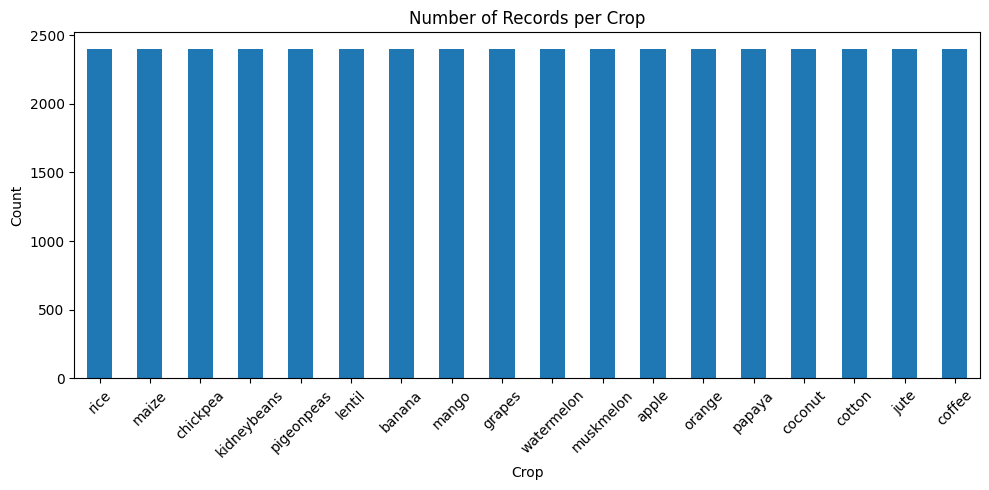

In [98]:
import matplotlib.pyplot as plt

crop_counts = df['label'].value_counts()

plt.figure(figsize=(10,5))
crop_counts.plot(kind='bar')
plt.title("Number of Records per Crop")
plt.xlabel("Crop")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


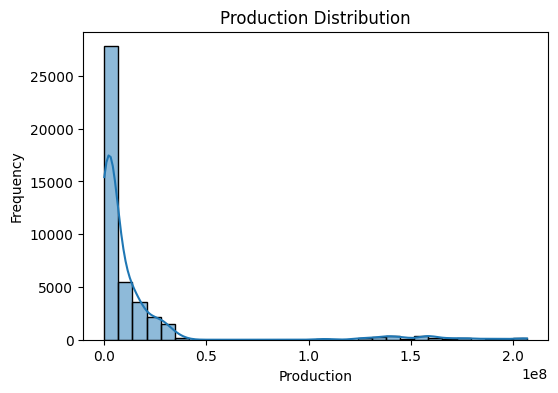

In [55]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df['Value'], bins=30, kde=True)
plt.title("Production Distribution")
plt.xlabel("Production")
plt.ylabel("Frequency")
plt.show()

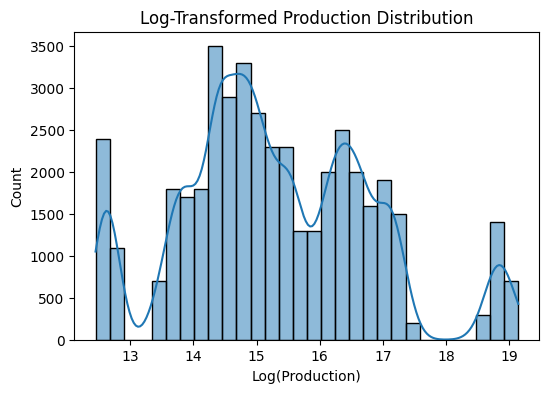

In [56]:
import numpy as np
df['log_production'] = np.log1p(df['Value'])

plt.figure(figsize=(6,4))
sns.histplot(df['log_production'], bins=30, kde=True)
plt.title("Log-Transformed Production Distribution")
plt.xlabel("Log(Production)")
plt.show()

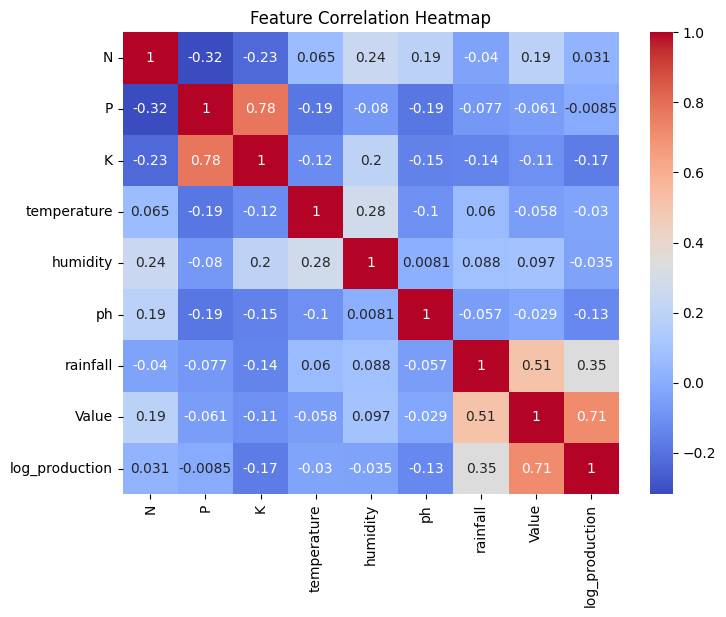

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

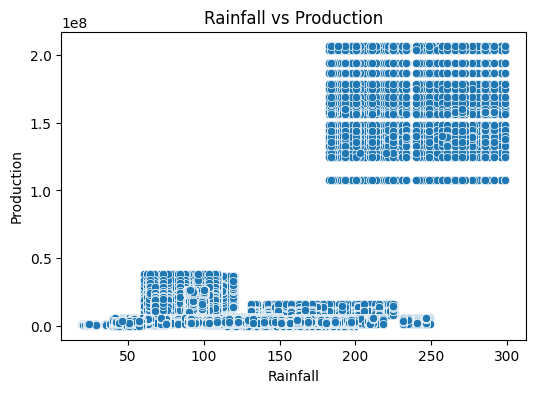

In [58]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='rainfall', y='Value', data=df)
plt.title("Rainfall vs Production")
plt.xlabel("Rainfall")
plt.ylabel("Production")
plt.show()

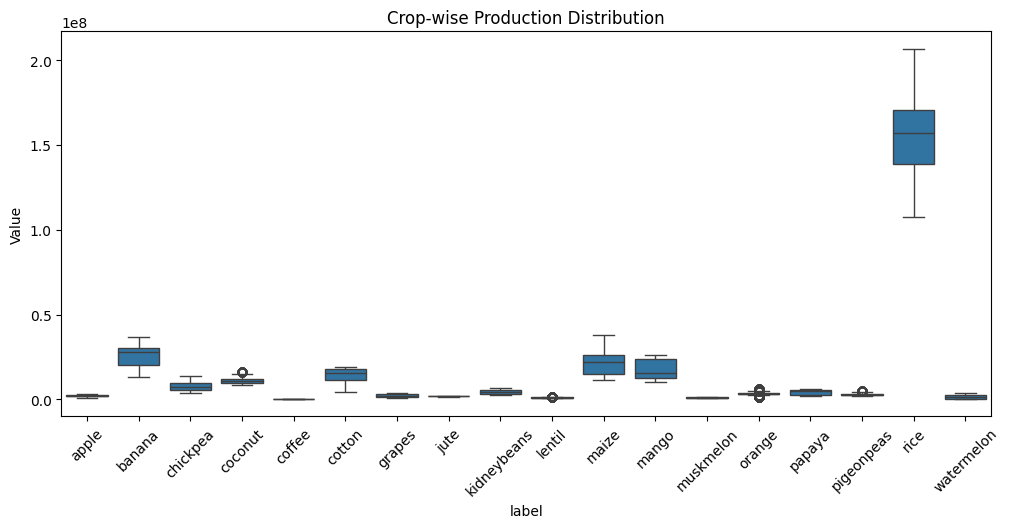

In [59]:
plt.figure(figsize=(12,5))
sns.boxplot(x='label', y='Value', data=df)
plt.xticks(rotation=45)
plt.title("Crop-wise Production Distribution")
plt.show()


Removing Outliers After Merging


In [99]:
import pandas as pd


df = pd.read_csv("/content/AgriYield_18Crops_Final_Clean.csv")

print("Before removing outliers:", df.shape)

numeric_cols = ["Value", "N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("After removing outliers:", df.shape)

df.to_csv("AgriYield_NoOutliers.csv", index=False)


Before removing outliers: (43200, 10)
After removing outliers: (32544, 10)


In [61]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/AgriYield_NoOutliers.csv")

# Count unique crops
unique_crops = df["label"].nunique()

print("Number of unique crops:", unique_crops)

# (Optional) See crop names
print("Crop names:")
print(sorted(df["label"].unique()))


Number of unique crops: 15
Crop names:
['banana', 'chickpea', 'coconut', 'coffee', 'cotton', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'watermelon']


Model Training


In [62]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

In [63]:
df = pd.read_csv("/content/AgriYield_NoOutliers.csv")
print("Dataset shape:", df.shape)

Dataset shape: (32544, 10)


In [65]:
y = df['Value']

In [66]:
X = df.drop(columns=['Value', 'label', 'Element'])

In [67]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,91,94,46,29.367924,76.249001,6.149934,92.828409
1,103,72,51,26.126434,81.813650,6.099479,104.481286
2,103,72,51,26.126434,81.813650,6.099479,104.481286
3,103,72,51,26.126434,81.813650,6.099479,104.481286
4,103,72,51,26.126434,81.813650,6.099479,104.481286


In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [76]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression")
print("Training R2:", r2_score(y_train, y_train_pred_lr))
print("Testing R2 :", r2_score(y_test, y_test_pred_lr))

Linear Regression
Training R2: 0.09445327596728192
Testing R2 : 0.09461781124387247


In [78]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression")
print("Training R2:", r2_score(y_train, y_train_pred_lr))
print("Testing R2 :", r2_score(y_test, y_test_pred_lr))

Linear Regression
Training R2: 0.09445327596728192
Testing R2 : 0.09461781124387247


In [82]:
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost")
print("Training R2:", r2_score(y_train, y_train_pred_xgb))
print("Testing R2 :", r2_score(y_test, y_test_pred_xgb))


XGBoost
Training R2: 0.8513982328103079
Testing R2 : 0.8429972866633662
